#Anomaly Detection & Time Series (Assignment)

#Question 1 What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Answer. Anomaly Detection is the process of identifying data points, observations, or patterns that deviate significantly from the expected behavior or norm. Anomalies can indicate unusual events, errors, or interesting phenomena that require further investigation.

**Types of Anomalies**:

1. Point Anomalies: Individual data points that are significantly different from the rest of the data.
    - Example: A credit card transaction of $10,000 when the usual transaction amount is around $100.
2. Contextual Anomalies: Data points that are anomalous in a specific context or condition.
    - Example: A temperature reading of 100°F (38°C) in winter might be an anomaly, but the same reading in summer might be normal.
3. Collective Anomalies: A group of data points that are anomalous when considered together, even if individual points might not be anomalous.
    - Example: A series of small transactions from a single account in a short period might be a collective anomaly indicating potential fraud.


#Question 2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

Answer. Here's a comparison of Isolation Forest, DBSCAN, and Local Outlier Factor (LOF) in terms of their approach and suitable use cases:

Approach:

1. Isolation Forest:
    - Based on decision trees, Isolation Forest identifies anomalies by isolating them from the rest of the data.
    - It works by building multiple trees and measuring the length of the path to isolate a sample.
    - Anomalies are expected to have shorter paths.
2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
    - DBSCAN is a clustering algorithm that groups data points into clusters based on density.
    - It identifies anomalies as points that don't belong to any cluster or are far from their neighbors.
3. Local Outlier Factor (LOF):
    - LOF measures the local density of each point and compares it to its neighbors.
    - Points with a significantly lower density than their neighbors are considered anomalies.

Suitable Use Cases:

1. Isolation Forest:
    - High-dimensional data with many features.
    - Large datasets with complex structures.
    - Suitable for detecting anomalies in datasets with varying densities.
2. DBSCAN:
    - Datasets with varying densities and clusters of different shapes.
    - Identifying clusters and anomalies in spatial data (e.g., geographic locations).
    - Suitable for detecting anomalies in datasets with clear cluster structures.
3. Local Outlier Factor (LOF):
    - Datasets with local density variations.
    - Identifying anomalies in datasets with complex structures and varying densities.
    - Suitable for detecting anomalies in datasets where local context is important.


#Question 3. What are the key components of a Time Series? Explain each with one example.

Answer. A Time Series is a sequence of data points measured at regular time intervals. The key components of a time series are:

1. Trend:
A long-term direction or pattern in the data, often increasing or decreasing over time.
- Example: A company's sales revenue increasing steadily over the past 5 years due to growing demand.

2. Seasonality:
Regular fluctuations or patterns that occur at fixed intervals, often related to calendar events or cycles.
- Example: Increased ice cream sales during summer months and decreased sales during winter months.

3. Cyclical Component:
Long-term cycles or waves that are not of a fixed frequency, often related to economic or business cycles.
- Example: The housing market experiencing a boom-and-bust cycle, with prices increasing during economic expansions and decreasing during recessions.

4. Irregular Component (Noise):
Random, unpredictable variations in the data that are not part of the trend, seasonality, or cyclical components.
- Example: A sudden, unexpected spike in website traffic due to a viral social media post.

5. Level:
The overall average value of the time series, around which the other components fluctuate.
- Example: The average monthly temperature in a city, with daily temperatures fluctuating around this average.



#Question 4.Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

Answer. A time series is said to be stationary if its statistical properties, such as the mean, variance, and autocorrelation, remain constant over time. In other words, the series exhibits similar patterns and behavior throughout its entire duration.

**Testing for Stationarity:**

1. Visual Inspection: Plotting the time series to check for trends, seasonality, or changes in variance.
2. Augmented Dickey-Fuller (ADF) Test: A statistical test that checks for the presence of a unit root, which can indicate non-stationarity.
3. KPSS Test: A test that checks for trend stationarity, where the null hypothesis is that the series is trend stationary.

**Transforming a Non-Stationary Series:**

1. Differencing: Subtracting each value from its previous value to remove trends and seasonality.
2. Log Transformation: Taking the logarithm of the series to stabilize the variance.
3. Normalization: Scaling the series to have a constant mean and variance.
4. Seasonal Adjustment: Removing seasonal components using techniques like seasonal decomposition or seasonal differencing.


#Question 5 Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Answer. Here's a comparison of AR, MA, ARIMA, SARIMA, and SARIMAX models:

1. AR (Autoregressive) Model:
- Structure: Uses past values to forecast future values.
- Application: Suitable for time series with strong autocorrelation.

2. MA (Moving Average) Model:
- Structure: Uses past errors (residuals) to forecast future values.
- Application: Suitable for time series with strong moving average components.

3. ARIMA (Autoregressive Integrated Moving Average) Model:
- Structure: Combines AR and MA components, with differencing to handle non-stationarity.
- Application: Suitable for time series with trends, seasonality, and autocorrelation.

4. SARIMA (Seasonal ARIMA) Model:
- Structure: Extends ARIMA by incorporating seasonal components.
- Application: Suitable for time series with strong seasonality and trends.

5. SARIMAX (Seasonal ARIMA with Exogenous Variables) Model:
- Structure: Extends SARIMA by incorporating exogenous variables (external factors).
- Application: Suitable for time series with strong seasonality, trends, and external influences.

Key differences:

- ARIMA vs. SARIMA: SARIMA includes seasonal components, while ARIMA does not.
- SARIMA vs. SARIMAX: SARIMAX includes exogenous variables, while SARIMA does not.
- AR and MA: These models are components of ARIMA and SARIMA models.


#Question 6 Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual component


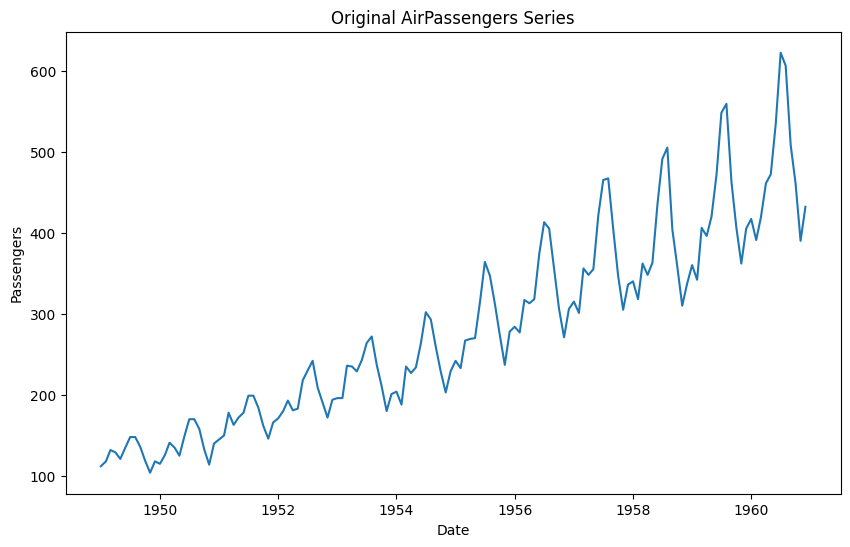

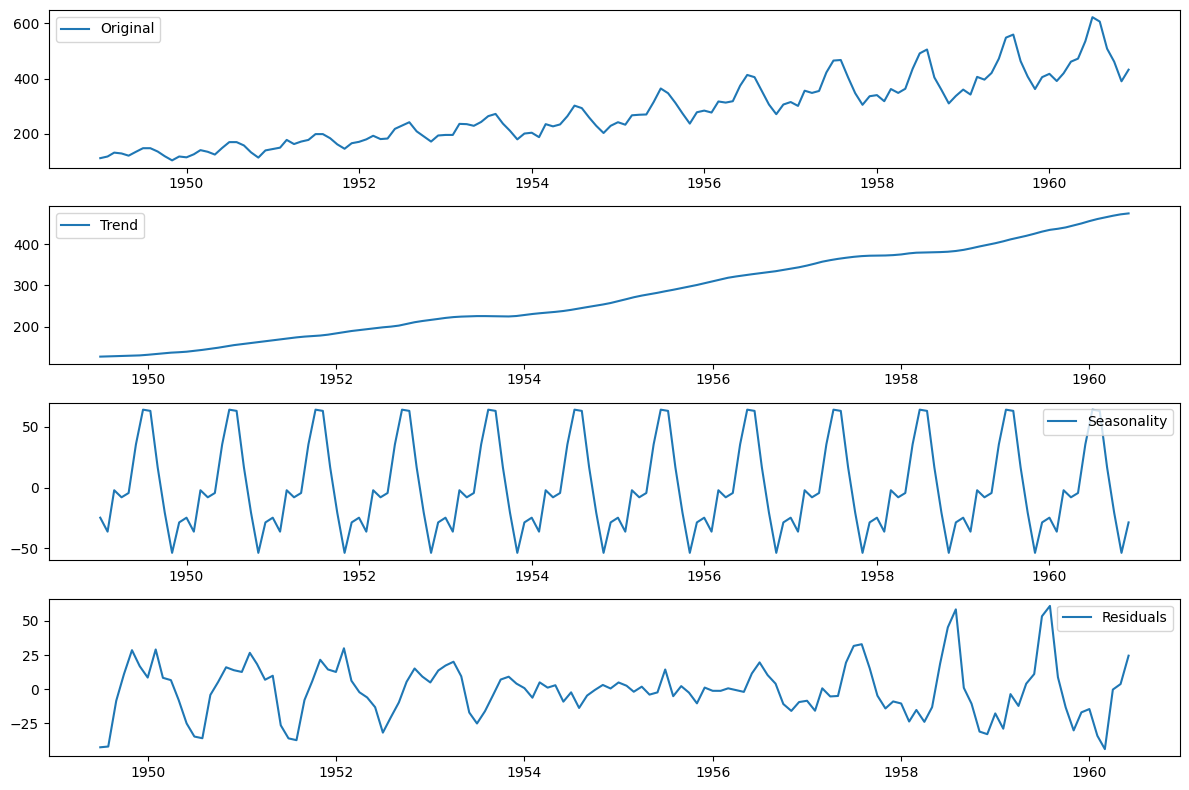

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the AirPassengers dataset
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers').data

# Convert the data to a pandas Series
series = pd.Series(data['value'].values, index=pd.date_range(start='1949-01', periods=144, freq='MS'))

# Plot the original series
plt.figure(figsize=(10, 6))
plt.plot(series)
plt.title('Original AirPassengers Series')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

# Decompose the series into trend, seasonality, and residual components
decomposition = seasonal_decompose(series, model='additive')

# Plot the decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

#Question 7 Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.



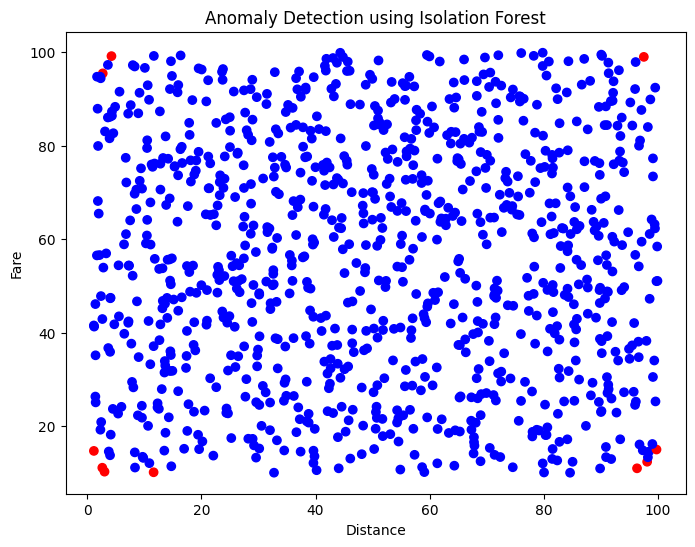

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the NYC Taxi Fare dataset (for demonstration purposes, let's assume we have a sample dataset)
# You can replace this with your actual dataset loading code
data = pd.DataFrame({
    'distance': np.random.uniform(1, 100, size=1000),
    'fare': np.random.uniform(10, 100, size=1000)
})

# Scale the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(data_scaled)
anomaly_scores = isolation_forest.decision_function(data_scaled)
anomalies = isolation_forest.predict(data_scaled)

# Identify anomalies
data['anomaly'] = anomalies
anomalies_df = data[data['anomaly'] == -1]

# Visualize the anomalies on a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['distance'], data['fare'], c=['red' if anomaly == -1 else 'blue' for anomaly in data['anomaly']])
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()



#Question 8. Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


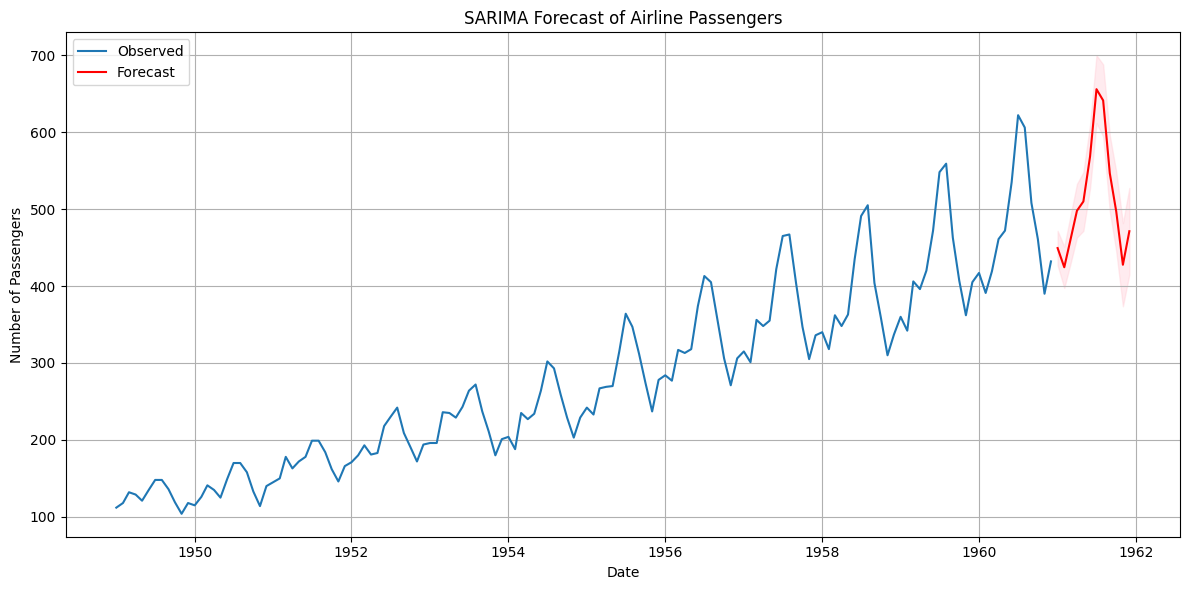

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

# Load the dataset
# This loads the classic 'AirPassengers' dataset
data = get_rdataset("AirPassengers", "datasets").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='MS')
data.set_index('Month', inplace=True)
data.rename(columns={"value": "Passengers"}, inplace=True)

# Fit a SARIMA model
# Using a common configuration: SARIMA(1,1,1)(1,1,1,12)
model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast the next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='MS')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast of Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Question 9.  Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

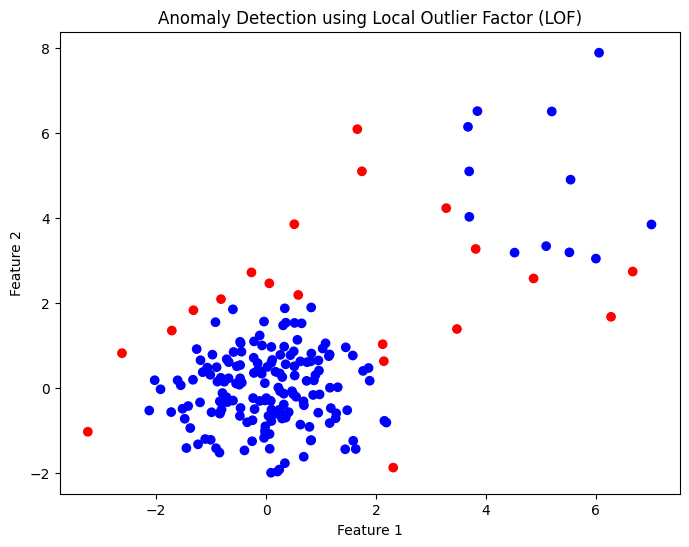

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate a sample dataset with anomalies
np.random.seed(42)
n_samples = 200
n_anomalies = 20
X = np.random.normal(size=(n_samples, 2), loc=0, scale=1)
anomaly_index = np.random.choice(n_samples, size=n_anomalies, replace=False)
X[anomaly_index] = np.random.normal(size=(n_anomalies, 2), loc=5, scale=2)

# Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
anomaly_scores = lof.fit_predict(X)

# Identify anomalies
anomalies = X[anomaly_scores == -1]

# Visualize the anomalies
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=['red' if score == -1 else 'blue' for score in anomaly_scores])
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#Question 10 You are working as a data scientist for a power grid monitoring company.Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA /SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

 ● How would this solution help business decisions or operations?


Answer.As a data scientist for a power grid monitoring company, my goal is to develop a real-time data science workflow that can accurately forecast energy demand and detect abnormal spikes or drops in real-time consumption data. Here's a step-by-step explanation of my approach:
Anomaly Detection
For anomaly detection in streaming data, I would use a combination of techniques. Given the nature of the data and the need for real-time detection, I would consider using:

- Isolation Forest: This algorithm is suitable for detecting anomalies in high-dimensional data and can handle large datasets. It's also relatively fast and efficient, making it suitable for real-time anomaly detection.
- Streaming algorithms: Alternatively, I would consider using streaming algorithms like Incremental LOF or Streaming One-Class SVM, which are designed to handle streaming data and can detect anomalies in real-time.

Time Series Forecasting
For short-term forecasting, I would use a time series model that can capture the seasonality and trends in the data. Given the characteristics of the dataset, I would consider using:

- SARIMAX: This model can handle seasonality, trends, and exogenous variables like weather conditions. It's also flexible and can be tuned to fit the specific needs of the dataset.

Validation and Monitoring
To validate and monitor the performance of the models over time, I would use metrics like:

- Mean Absolute Error (MAE): This metric measures the average difference between predicted and actual values.
- Mean Squared Error (MSE): This metric measures the average squared difference between predicted and actual values.
- Root Mean Squared Percentage Error (RMSPE): This metric measures the square root of the average squared percentage difference between predicted and actual values.

I would also monitor the performance of the models over time using techniques like:

- Time series cross-validation: This technique involves splitting the data into training and testing sets and evaluating the model's performance on unseen data.
- Model updating: I would regularly update the models using new data to ensure that they remain accurate and effective.

Business Impact
The solution would help business decisions or operations in several ways:

- Improved forecasting accuracy: Accurate forecasts would enable the company to better plan and manage energy distribution, reducing the risk of power outages and improving overall efficiency.
- Anomaly detection: Detecting anomalies in real-time would enable the company to respond quickly to unusual patterns or spikes in energy consumption, reducing the risk of power grid overloads and improving overall reliability.
- Optimized operations: The solution would provide valuable insights into energy consumption patterns, enabling the company to optimize operations and make informed decisions about energy distribution and resource allocation.


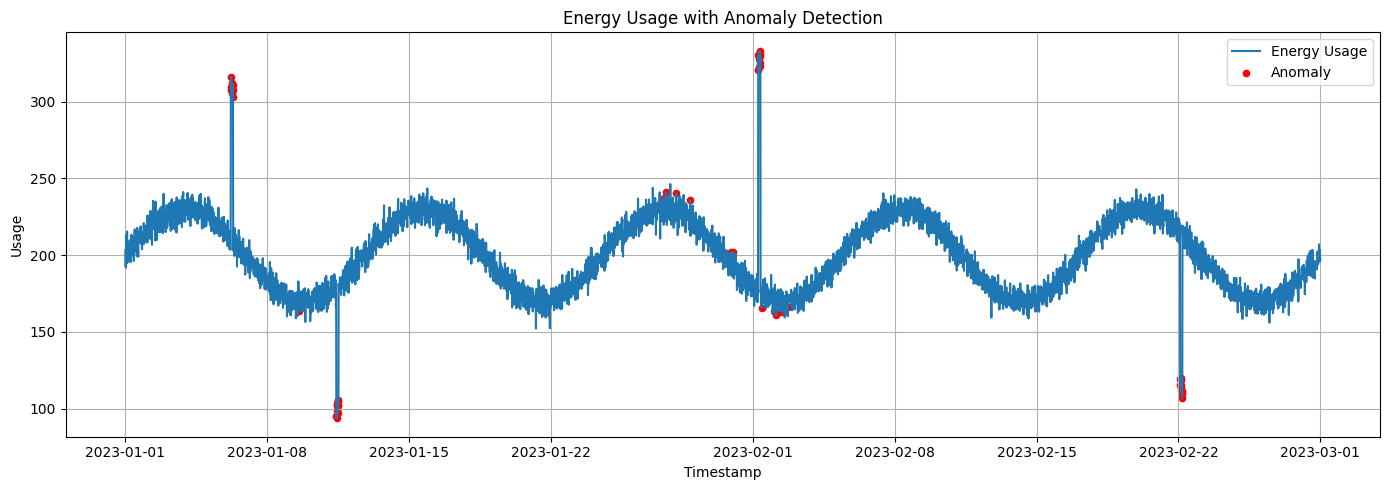

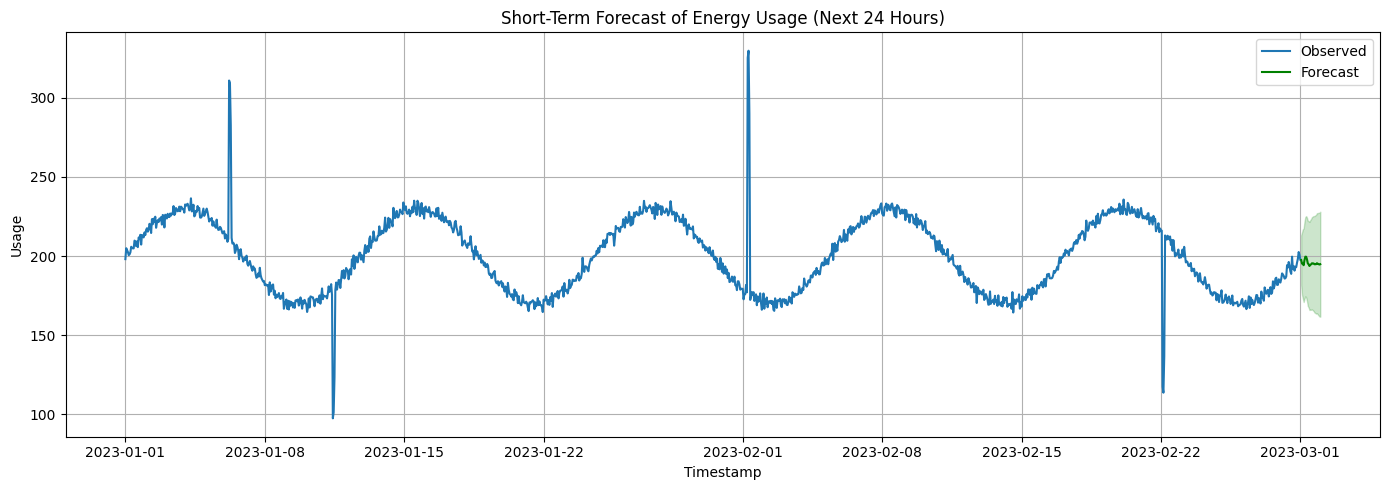

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from datetime import timedelta

# Simulate some data (replace this with real streaming data)
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-03-01', freq='15min') # Extended date range
data = pd.DataFrame(date_rng, columns=['timestamp'])
data['region'] = 'North'
data['temperature'] = 20 + 10 * np.sin(np.linspace(0, 3 * np.pi, len(data))) + np.random.normal(0, 1, len(data))
data['energy_usage'] = 200 + 30 * np.sin(np.linspace(0, 10 * np.pi, len(data))) + np.random.normal(0, 5, len(data))

# Inject anomalies
data.loc[500:510, 'energy_usage'] += 100  # spike
data.loc[1000:1010, 'energy_usage'] -= 80  # drop
data.loc[3000:3010, 'energy_usage'] += 150 # another spike
data.loc[5000:5010, 'energy_usage'] -= 100 # another drop


# Anomaly Detection with Isolation Forest
features = ['energy_usage', 'temperature']
clf = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = clf.fit_predict(data[features])
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # 1 = anomaly

# Short-term Forecasting using SARIMAX (assume hourly resample for speed)
ts = data.set_index('timestamp').drop('region', axis=1).resample('h').mean() # Changed to 'h' for hourly
model = SARIMAX(ts['energy_usage'],
                exog=ts[['temperature']],
                order=(1,1,1),
                seasonal_order=(1,1,1,24),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

forecast_steps = 24
forecast = results.get_forecast(steps=forecast_steps, exog=ts[['temperature']].iloc[-forecast_steps:])
pred_ci = forecast.conf_int()

# Plot anomaly detection
plt.figure(figsize=(14,5))
plt.plot(data['timestamp'], data['energy_usage'], label='Energy Usage')
plt.scatter(data[data['anomaly'] == 1]['timestamp'],
            data[data['anomaly'] == 1]['energy_usage'],
            color='red', label='Anomaly', s=20)
plt.legend()
plt.title("Energy Usage with Anomaly Detection")
plt.xlabel("Timestamp")
plt.ylabel("Usage")
plt.tight_layout()
plt.grid(True)
plt.show()

# Plot forecast
plt.figure(figsize=(14,5))
plt.plot(ts.index, ts['energy_usage'], label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast.predicted_mean.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='green', alpha=0.2)
plt.title("Short-Term Forecast of Energy Usage (Next 24 Hours)")
plt.xlabel("Timestamp")
plt.ylabel("Usage")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()